In [ ]:
#importación de la base de datos
import pandas as pd
df=pd.read_csv("BRCA.csv", ",")
#Se eliminan las variables tipo fecha
df=df.drop(["Date_of_Surgery", "Date_of_Last_Visit"], axis=1)
#Se eliminan las observaciones nulas en cualquier columna
df = df.dropna()
df.head()

In [256]:
df.shape

(321, 14)

Una base de datos sobre el pacientes con cancer de mama que han sido sometidos a una cirugía. Se eliminan las variable tipo fecha y se dejan 5 variables continuas y siete variables categoricas, más una variable objetivo también categorica

In [257]:
#Se eliminan los datos categoricos
df=df.drop(["Patient_ID", "Gender", "Tumour_Stage","Histology", "ER status", "PR status","HER2 status", "Surgery_type"], axis=1)

In [ ]:
df.describe()

In [ ]:
#Histograma de las variables continuas
df.Age.hist()

In [ ]:
df.Protein1.hist()

In [ ]:
df.Protein2.hist()

In [ ]:
df.Protein3.hist()

In [ ]:
df.Protein4.hist()

Como se ve la muestra los factores de crecimiento del tumor (PR y RR), no generan información adiconal para el pronosticos entonces se eliminan 

In [264]:
#Definición de la x
x=df.drop(["Patient_Status"], axis=1)

In [265]:
#Definicion de y
y=df["Patient_Status"]

In [266]:
#Separa la base de datos, 70% par el entrenamiento 30% para testeo
from sklearn.model_selection import train_test_split
xEntreno, xTest, yEntreno, yTest = train_test_split(x, y, test_size=0.3, random_state=0,shuffle=True)
#xEntreno la matriz de atributos de entrenamiento
#yEntreno la clase de entrenamiento
#xTest la matirz de atributos de testeo
#yTest la clase de testeo

K-Nearest Neighbor

In [272]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
xEntreno = scaler.fit_transform(xEntreno)
xTest = scaler.transform(xTest)
#Se genera una escala entre 0 y 10 para homogenizar las caracteristicas

In [268]:
from sklearn.neighbors import KNeighborsClassifier
nvecinos=3 #Se toma a priori 3 vecinos
KNN = KNeighborsClassifier(nvecinos)
KNN.fit(xEntreno,yEntreno)
print('la precisión de la clasificacion KNN en el conjunto de entrenamiento: {:.2f}'.format(KNN.score(xEntreno, yEntreno)))
print('la precisión de la clasificacion KNN en conjunto de testeo: {:.2f}'.format(KNN.score(xTest, yTest)))

la precisión de la clasificacion KNN en el conjunto de entrenamiento: 0.81
la precisión de la clasificacion KNN en conjunto de testeo: 0.67


In [273]:
#Predicción
yhat=KNN.predict(xTest)

In [ ]:
#Probabilidad de yhat
print(KNN.predict_proba(xTest))

In [276]:
#Los indicadores de presición
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(yTest, yhat))
print(classification_report(yTest, yhat))

[[65 15]
 [17  0]]
              precision    recall  f1-score   support

       Alive       0.79      0.81      0.80        80
        Dead       0.00      0.00      0.00        17

    accuracy                           0.67        97
   macro avg       0.40      0.41      0.40        97
weighted avg       0.65      0.67      0.66        97



In [ ]:
#Relacion entre el numero de vecinos y la presicion
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatche
vecinos=range(1,20)
puntaje=[]
for j in vecinos:
  KNN=KNeighborsClassifier(n_neighbors = j)
  KNN.fit(xEntreno, yEntreno)
  puntaje.append(KNN.score(xTest, yTest))
plt.figure()
plt.xlabel("vecinos")
plt.ylabel("presición")
plt.scatter(vecinos,puntaje)

In [ ]:
#Determinar el numero optimo de vecinos
from sklearn.model_selection import GridSearchCV
parametros = {"n_neighbors": range(1, 30)}
gr= GridSearchCV(KNN, parametros)
gr.fit(xEntreno, yEntreno)

In [279]:
gr.best_params_

{'n_neighbors': 10}

In [280]:
#Se repite el proceso con 10 vecinos
nvecinos=10
KNN2 = KNeighborsClassifier(nvecinos)
KNN2.fit(xEntreno,yEntreno)
print('la precisión de la clasificacion KNN en el conjunto de entrenamiento: {:.2f}'
     .format(KNN2.score(xEntreno, yEntreno)))
print('la precisión de la clasificacion KNN en conjunto de testeo: {:.2f}'
     .format(KNN2.score(xTest, yTest)))

la precisión de la clasificacion KNN en el conjunto de entrenamiento: 0.77
la precisión de la clasificacion KNN en conjunto de testeo: 0.84


In [ ]:
#Predicción y probabilidae
yhat2=KNN2.predict(xTest)
print(KNN2.predict_proba(xTest))

In [282]:
#Matriz de confusión e indicadores de precision
print(confusion_matrix(yTest, yhat2))
print(classification_report(yTest, yhat2))

[[80  0]
 [16  1]]
              precision    recall  f1-score   support

       Alive       0.83      1.00      0.91        80
        Dead       1.00      0.06      0.11        17

    accuracy                           0.84        97
   macro avg       0.92      0.53      0.51        97
weighted avg       0.86      0.84      0.77        97



In [283]:
KNN3 = KNeighborsClassifier(n_neighbors= 10, weights="distance")
KNN3.fit(xEntreno,yEntreno)
print('la precisión de la clasificacion KNN3 en el conjunto de entrenamiento: {:.2f}'.format(KNN3.score(xEntreno, yEntreno)))
print('la precisión de la clasificacion KNN3 en conjunto de testeo: {:.2f}'.format(KNN3.score(xTest, yTest)))

la precisión de la clasificacion KNN3 en el conjunto de entrenamiento: 1.00
la precisión de la clasificacion KNN3 en conjunto de testeo: 0.82


In [ ]:
#Predicción y probabilidae
yhat3=KNN3.predict(xTest)
print(KNN3.predict_proba(xTest))

In [285]:
print(confusion_matrix(yTest, yhat3))
print(classification_report(yTest, yhat3))

[[79  1]
 [16  1]]
              precision    recall  f1-score   support

       Alive       0.83      0.99      0.90        80
        Dead       0.50      0.06      0.11        17

    accuracy                           0.82        97
   macro avg       0.67      0.52      0.50        97
weighted avg       0.77      0.82      0.76        97



Random Forest

In [308]:
from sklearn.ensemble import RandomForestClassifier
#Se realiza la clasificación con 100 estimaciones
RFC = RandomForestClassifier(n_estimators=100, random_state=0)
RFC.fit(xEntreno,yEntreno)
print('la precisión de la clasificacion RFC en el conjunto de entrenamiento: {:.2f}'.format(RFC.score(xEntreno, yEntreno)))
print('la precisión de la clasificacion RFC en conjunto de testeo: {:.2f}'.format(RFC.score(xTest, yTest)))

la precisión de la clasificacion RFC en el conjunto de entrenamiento: 1.00
la precisión de la clasificacion RFC en conjunto de testeo: 0.79


In [309]:
#predicción
yhat4=RFC.predict(xTest)

In [ ]:
#probabilidad
print(RFC.predict_proba(xTest))

In [311]:
#Matriz de confusión e indicadores de precisión
print(confusion_matrix(yTest, yhat4))
print(classification_report(yTest, yhat4))

[[77  3]
 [17  0]]
              precision    recall  f1-score   support

       Alive       0.82      0.96      0.89        80
        Dead       0.00      0.00      0.00        17

    accuracy                           0.79        97
   macro avg       0.41      0.48      0.44        97
weighted avg       0.68      0.79      0.73        97



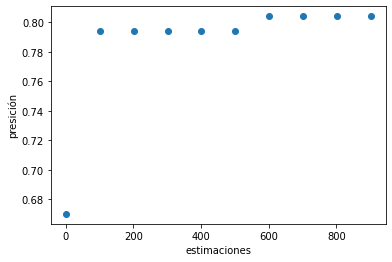

In [313]:
#Relacion entre la precisión y el numero de estimaciones
nestimaciones=range(1,1000,100)
puntajeRFC=[]
for j in nestimaciones:
  RFC=RandomForestClassifier(n_estimators=j,random_state=0)
  RFC.fit(xEntreno, yEntreno)
  puntajeRFC.append(RFC.score(xTest, yTest))
plt.figure()
plt.xlabel("estimaciones")
plt.ylabel("presición")
plt.scatter(nestimaciones,puntajeRFC)

In [314]:
#Determinar el numero optimo de estimacione
from sklearn.model_selection import GridSearchCV
parametros = {"n_estimators": range(1, 1000,100)}
gr= GridSearchCV(RFC, parametros)
gr.fit(xEntreno, yEntreno)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=901, n_jobs=None,
                                              oob_score=False, random_state=0,
                                

In [315]:
gr.best_params_

{'n_estimators': 801}

In [317]:
#Se realiza la clasificación con 100 estimaciones
RFC2 = RandomForestClassifier(n_estimators=801, random_state=0)
RFC2.fit(xEntreno,yEntreno)
print('la precisión de la clasificacion RFC2 en el conjunto de entrenamiento: {:.2f}'.format(RFC2.score(xEntreno, yEntreno)))
print('la precisión de la clasificacion RFC2 en conjunto de testeo: {:.2f}'.format(RFC2.score(xTest, yTest)))

la precisión de la clasificacion RFC2 en el conjunto de entrenamiento: 1.00
la precisión de la clasificacion RFC2 en conjunto de testeo: 0.80


In [320]:
yhat5=RFC2.predict(xTest)
print(RFC.predict_proba(xTest))

[[0.48938826 0.51061174]
 [0.73033708 0.26966292]
 [0.82646692 0.17353308]
 [0.62546816 0.37453184]
 [0.79151061 0.20848939]
 [0.74656679 0.25343321]
 [0.9051186  0.0948814 ]
 [0.74032459 0.25967541]
 [0.79275905 0.20724095]
 [0.7752809  0.2247191 ]
 [0.60799001 0.39200999]
 [0.91385768 0.08614232]
 [0.60299625 0.39700375]
 [0.84893883 0.15106117]
 [0.88014981 0.11985019]
 [0.56679151 0.43320849]
 [0.63670412 0.36329588]
 [0.82771536 0.17228464]
 [0.7752809  0.2247191 ]
 [0.80399501 0.19600499]
 [0.91385768 0.08614232]
 [0.91885144 0.08114856]
 [0.80898876 0.19101124]
 [0.88389513 0.11610487]
 [0.7340824  0.2659176 ]
 [0.57178527 0.42821473]
 [0.91510612 0.08489388]
 [0.83770287 0.16229713]
 [0.84019975 0.15980025]
 [0.71410737 0.28589263]
 [0.97003745 0.02996255]
 [0.80524345 0.19475655]
 [0.67290886 0.32709114]
 [0.64669164 0.35330836]
 [0.87640449 0.12359551]
 [0.82771536 0.17228464]
 [0.88888889 0.11111111]
 [0.51685393 0.48314607]
 [0.86641698 0.13358302]
 [0.86766542 0.13233458]


In [321]:
print(confusion_matrix(yTest, yhat4))
print(classification_report(yTest, yhat4))

[[77  3]
 [17  0]]
              precision    recall  f1-score   support

       Alive       0.82      0.96      0.89        80
        Dead       0.00      0.00      0.00        17

    accuracy                           0.79        97
   macro avg       0.41      0.48      0.44        97
weighted avg       0.68      0.79      0.73        97

